### **Downloading Dataset**

In [1]:
!pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/msambare/fer2013")

### **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet
from keras.losses import categorical_crossentropy

#### Training Data

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        "fer2013\\train", 
        target_size=(224,224), 
        batch_size=32,
)
train_generator.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

#### Testing Data

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        "fer2013\\test",
        target_size=(224, 224),
        batch_size=32,
)
validation_generator.class_indices

Found 7178 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

### **Visualizing the images of the training data**

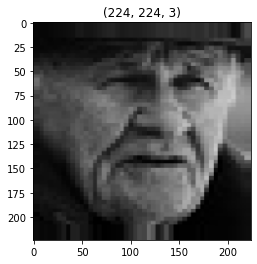

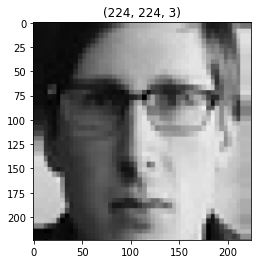

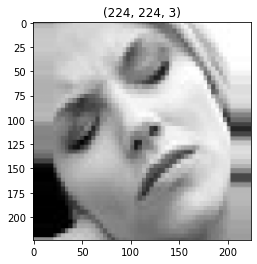

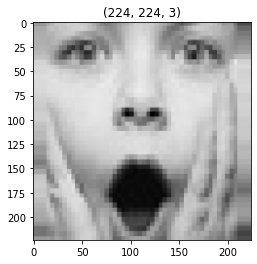

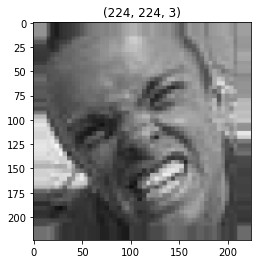

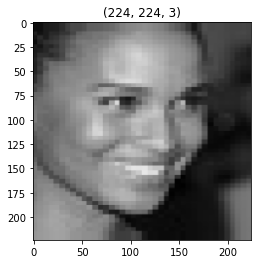

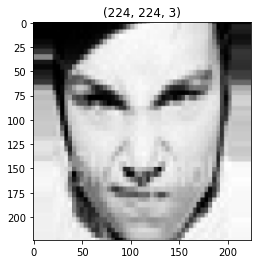

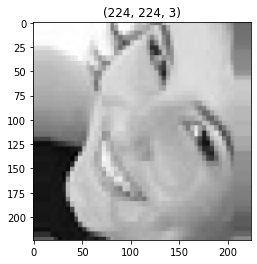

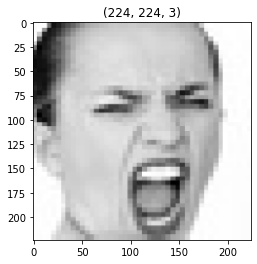

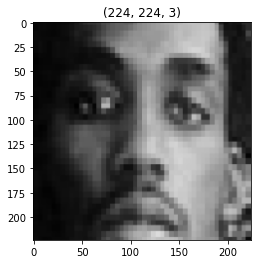

In [5]:
train_img , label = train_generator.next()

def plotImages(img_arr, label):
    count = 0
    for im, l in zip(img_arr,label) :
        plt.imshow(im)
        plt.title(im.shape)
        plt.axis = False
        plt.show()

        count += 1
        if count == 10:
            break

plotImages(train_img, label)


### **Visualizing the images of the testing data**

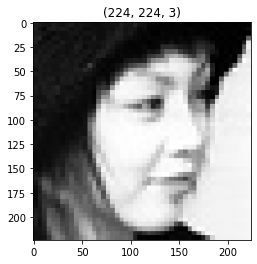

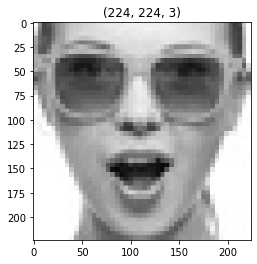

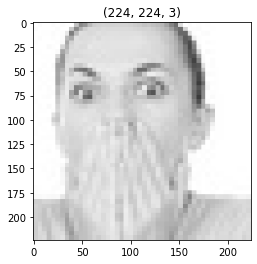

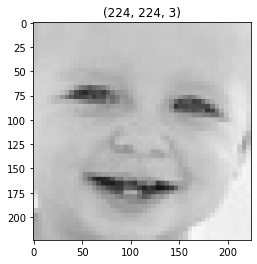

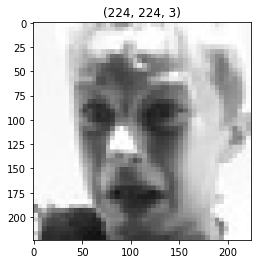

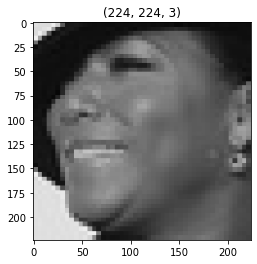

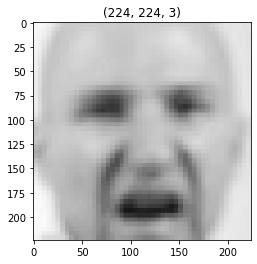

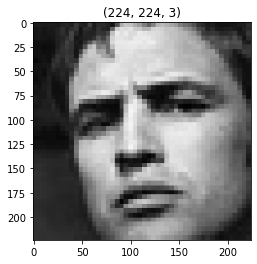

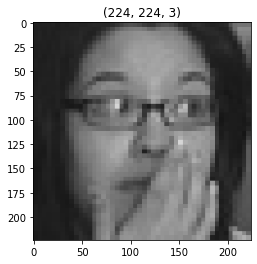

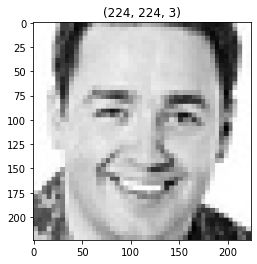

In [6]:
test_img , label = validation_generator.next()
def plotImages(img_arr, label):
    count = 0
    for im , l in zip(img_arr,label) :
        plt.imshow(im)
        plt.title(im.shape)
        plt.show()

        count += 1
        if count == 10:
            break
        
plotImages(test_img, label)

### **Using MobileNet for its pre-trained weights**


In [7]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

### **Creating our model.**


In [8]:
model = Model(base_model.input, x)
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

#### Training model

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [11]:
hist = model.fit(train_generator, 
                           steps_per_epoch= 500, 
                           epochs= 50, 
                           validation_data= validation_generator, 
                           validation_steps= 10)

Epoch 1/50
500/500 [==============================] - 430s 858ms/step - loss: 7.3081 - accuracy: 0.5104 - val_loss: 10.2310 - val_accuracy: 0.4750
Epoch 2/50
500/500 [==============================] - 382s 763ms/step - loss: 7.3336 - accuracy: 0.5278 - val_loss: 6.9000 - val_accuracy: 0.5437
Epoch 3/50
500/500 [==============================] - 431s 861ms/step - loss: 7.1746 - accuracy: 0.5509 - val_loss: 9.5473 - val_accuracy: 0.4531
Epoch 4/50
500/500 [==============================] - 383s 765ms/step - loss: 7.5873 - accuracy: 0.5646 - val_loss: 9.7289 - val_accuracy: 0.4969
Epoch 5/50
500/500 [==============================] - 348s 696ms/step - loss: 7.2990 - accuracy: 0.5754 - val_loss: 8.9844 - val_accuracy: 0.5344
Epoch 6/50
500/500 [==============================] - 396s 791ms/step - loss: 7.2613 - accuracy: 0.5814 - val_loss: 11.9053 - val_accuracy: 0.5031
Epoch 7/50
500/500 [==============================] - 554s 1s/step - loss: 7.4989 - accuracy: 0.5842 - val_loss: 10.3872 -

### **Saving the built Model**

In [12]:
# Save the model in h5 format 
model.save('final_model.h5')

#### **Train accuracy v/s Testing accuracy**

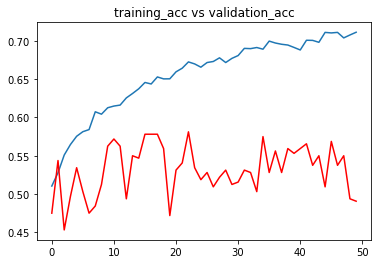

In [13]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'] , c = "red")
plt.title("training_acc vs validation_acc")
plt.show()

#### **Training Loss v/s Testing Loss**

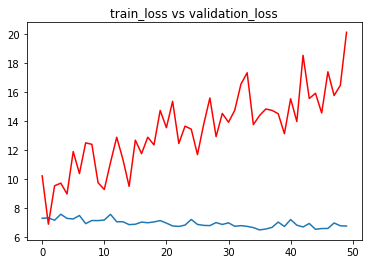

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'] , c = "red")
plt.title("train_loss vs validation_loss")
plt.show()

### **Testing the model using images**

In [15]:
op = dict(zip( train_generator.class_indices.values(), train_generator.class_indices.keys()))

 the image is of sad


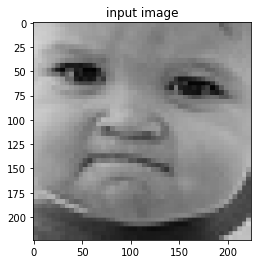

In [16]:
# path for the image to see if it predics correct class

path = "fer2013\\test\\angry\\PrivateTest_24569157.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()